In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ks_2samp
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Caricamento dei dati delle lunghezze dei segmenti
with open('/content/drive/MyDrive/Progetto DSN/Analysis_Data/segment_length.pkl', 'rb') as file:
    segment_length_data = pickle.load(file)

# Ora puoi accedere ai dati delle lunghezze dei segmenti per ogni area:
segment_length_VISp = segment_length_data['VISp']
segment_length_VISal = segment_length_data['VISal']
segment_length_SSp_bfd = segment_length_data['SSp_bfd']



In [4]:
total_segment_length_VISp = []
total_segment_length_VISal = []
total_segment_length_SSp_bfd = []

average_segment_length_VISp = []
average_segment_length_VISal = []
average_segment_length_SSp_bfd = []



for total, segment_count in segment_length_VISp:
  total_segment_length_VISp.append(total)
  average_segment_length_VISp.append(total/segment_count)

for total, segment_count in segment_length_VISal:
  total_segment_length_VISal.append(total)
  average_segment_length_VISal.append(total/segment_count)

for total, segment_count in segment_length_SSp_bfd:
  total_segment_length_SSp_bfd.append(total)
  average_segment_length_SSp_bfd.append(total/segment_count)


470664.60638589744

In [ ]:
total_segment_length_VISp

[(356514.7437968781, 11336),
 (68142.35104271717, 8705),
 (64824.03172591537, 5998),
 (54846.080759760465, 2552),
 (74994.45727415614, 2454),
 (55875.140820705354, 5610),
 (110255.07239462654, 2689),
 (163153.35872251535, 8387),
 (60580.58382418641, 3686),
 (444510.8156404043, 39750),
 (116596.82822958213, 20614),
 (45153.942798457996, 5732),
 (36941.56120222107, 1194),
 (53598.63080298945, 1583),
 (130092.84361878832, 12249),
 (98095.74689651288, 15048),
 (66073.56600036826, 2165),
 (35620.06082285802, 5703),
 (51162.25981273138, 6167),
 (68555.37475522688, 9376),
 (291747.8079747579, 11994),
 (277082.48057221033, 7783),
 (47386.38650848582, 1254),
 (95689.55090960431, 14781),
 (49743.71021099647, 2184),
 (51852.70237344323, 2211),
 (105703.35549241808, 15543),
 (107458.1175654488, 3033),
 (82704.06622074034, 13058),
 (61231.46433129923, 9121),
 (105070.43725122063, 4043),
 (78984.37369993654, 11989),
 (76981.08618155154, 4366),
 (288288.7330239563, 7026),
 (46293.8789428958, 1254),
 

ANALISI STATISTICA LUNGHEZZA TOTALE SEGMENTI

Statistiche descrittive per VISp: {'mean': 116017.98277958458, 'std': 105043.73870360482, 'median': 78928.94673587207}
Statistiche descrittive per VISal: {'mean': 160846.93559002108, 'std': 117411.3234536189, 'median': 122227.80503528047}
Statistiche descrittive per SSp_bfd: {'mean': 161646.22396570648, 'std': 107103.29994855015, 'median': 127176.06895645699}


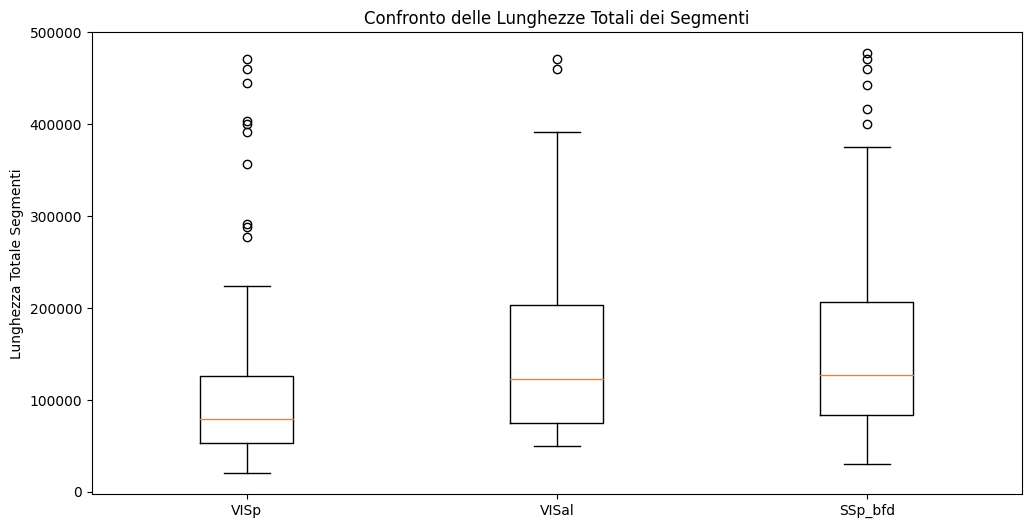

In [5]:
# Analisi statistica
def descriptive_stats(data):
    return {
        'mean': np.mean(data),
        'std': np.std(data),
        'median': np.median(data)
    }

stats_VISp = descriptive_stats(total_segment_length_VISp)
stats_VISal = descriptive_stats(total_segment_length_VISal)
stats_SSp_bfd = descriptive_stats(total_segment_length_SSp_bfd)

print("Statistiche descrittive per VISp:", stats_VISp)
print("Statistiche descrittive per VISal:", stats_VISal)
print("Statistiche descrittive per SSp_bfd:", stats_SSp_bfd)

# Visualizzazione dei risultati
plt.figure(figsize=(12, 6))
plt.boxplot([total_segment_length_VISp, total_segment_length_VISal, total_segment_length_SSp_bfd], labels=['VISp', 'VISal', 'SSp_bfd'])
plt.ylabel('Lunghezza Totale Segmenti')
plt.title('Confronto delle Lunghezze Totali dei Segmenti')
plt.show()

In [6]:
# Eseguire il t-test tra VISp e VISal
t_statistic_VISp_VISal, p_value_VISp_VISal = ttest_ind(total_segment_length_VISp, total_segment_length_VISal)
print(f"T-test VISp vs VISal: t-statistic = {t_statistic_VISp_VISal} , p-value = {p_value_VISp_VISal}")

# Eseguire il t-test tra VISp e SSp_bfd
t_statistic_VISp_SSp_bfd, p_value_VISp_SSp_bfd = ttest_ind(total_segment_length_VISp, total_segment_length_SSp_bfd)
print(f"T-test VISp vs SSp_bfd: t-statistic = {t_statistic_VISp_SSp_bfd} , p-value = {p_value_VISp_SSp_bfd}")

# Eseguire il t-test tra VISal e SSp_bfd
t_statistic_VISal_SSp_bfd, p_value_VISal_SSp_bfd = ttest_ind(total_segment_length_VISal, total_segment_length_SSp_bfd)
print(f"T-test VISal vs SSp_bfd: t-statistic = {t_statistic_VISal_SSp_bfd} , p-value = {p_value_VISal_SSp_bfd}")

# Eseguire il KS-test tra VISp e VISal
ks_statistic_VISp_VISal, ks_p_value_VISp_VISal = ks_2samp(total_segment_length_VISp, total_segment_length_VISal)
print(f"KS-test VISp vs VISal: ks-statistic = {ks_statistic_VISp_VISal} , p-value = {ks_p_value_VISp_VISal}")

# Eseguire il KS-test tra VISp e SSp_bfd
ks_statistic_VISp_SSp_bfd, ks_p_value_VISp_SSp_bfd = ks_2samp(total_segment_length_VISp, total_segment_length_SSp_bfd)
print(f"KS-test VISp vs SSp_bfd: ks-statistic = {ks_statistic_VISp_SSp_bfd} , p-value = {ks_p_value_VISp_SSp_bfd}")

# Eseguire il KS-test tra VISal e SSp_bfd
ks_statistic_VISal_SSp_bfd, ks_p_value_VISal_SSp_bfd = ks_2samp(total_segment_length_VISal, total_segment_length_SSp_bfd)
print(f"KS-test VISal vs SSp_bfd: ks-statistic = {ks_statistic_VISal_SSp_bfd} , p-value = {ks_p_value_VISal_SSp_bfd}")

T-test VISp vs VISal: t-statistic = -1.985117124672759 , p-value = 0.04945112233347714
T-test VISp vs SSp_bfd: t-statistic = -2.9890893046202867 , p-value = 0.0031563367450244363
T-test VISal vs SSp_bfd: t-statistic = -0.03608219321880601 , p-value = 0.9712682175749519
KS-test VISp vs VISal: ks-statistic = 0.2755681818181818 , p-value = 0.04620613010959291
KS-test VISp vs SSp_bfd: ks-statistic = 0.30227272727272725 , p-value = 0.00019610424357318425
KS-test VISal vs SSp_bfd: ks-statistic = 0.12443181818181819 , p-value = 0.7847282767280619


L'interpretazione dei risultati dei test T e KS test si basa sui valori delle statistiche dei test e dei p-value. Vediamo cosa indicano questi risultati:

### T-test

Il T-test verifica se ci sono differenze significative tra le medie di due gruppi.

#### VISp vs VISal
- **t-statistic = -1.985117124672759**
- **p-value = 0.04945112233347714**

Un p-value di 0.049 indica che c'è una differenza statisticamente significativa tra le medie delle lunghezze dei segmenti dei neuroni delle aree VISp e VISal al livello di significatività del 5% (0.05). Questo suggerisce che è improbabile che le medie delle lunghezze dei segmenti nei neuroni VISp e VISal siano uguali.

#### VISp vs SSp_bfd
- **t-statistic = -2.9890893046202867**
- **p-value = 0.0031563367450244363**

Un p-value di 0.003 indica una differenza altamente significativa tra le medie delle lunghezze dei segmenti dei neuroni delle aree VISp e SSp_bfd al livello di significatività dell'1% (0.01). Questo suggerisce che le medie delle lunghezze dei segmenti nei neuroni VISp e SSp_bfd sono molto probabilmente diverse.

#### VISal vs SSp_bfd
- **t-statistic = -0.03608219321880601**
- **p-value = 0.9712682175749519**

Un p-value di 0.971 suggerisce che non c'è una differenza significativa tra le medie delle lunghezze dei segmenti dei neuroni delle aree VISal e SSp_bfd. Questo indica che le medie delle lunghezze dei segmenti nei neuroni VISal e SSp_bfd sono molto probabilmente uguali.

### KS-test

Il KS-test verifica se due distribuzioni sono diverse.

#### VISp vs VISal
- **ks-statistic = 0.2755681818181818**
- **p-value = 0.04620613010959291**

Un p-value di 0.046 indica che c'è una differenza significativa tra le distribuzioni delle lunghezze dei segmenti dei neuroni delle aree VISp e VISal al livello di significatività del 5%. Questo suggerisce che le distribuzioni delle lunghezze dei segmenti nei neuroni VISp e VISal sono diverse.

#### VISp vs SSp_bfd
- **ks-statistic = 0.30227272727272725**
- **p-value = 0.00019610424357318425**

Un p-value di 0.0002 indica una differenza altamente significativa tra le distribuzioni delle lunghezze dei segmenti dei neuroni delle aree VISp e SSp_bfd al livello di significatività dell'1%. Questo suggerisce che le distribuzioni delle lunghezze dei segmenti nei neuroni VISp e SSp_bfd sono molto probabilmente diverse.

#### VISal vs SSp_bfd
- **ks-statistic = 0.12443181818181819**
- **p-value = 0.7847282767280619**

Un p-value di 0.785 suggerisce che non c'è una differenza significativa tra le distribuzioni delle lunghezze dei segmenti dei neuroni delle aree VISal e SSp_bfd. Questo indica che le distribuzioni delle lunghezze dei segmenti nei neuroni VISal e SSp_bfd sono molto probabilmente uguali.

### Conclusioni

1. **VISp vs VISal**: Ci sono differenze significative sia nelle medie che nelle distribuzioni delle lunghezze dei segmenti dei neuroni.
2. **VISp vs SSp_bfd**: Ci sono differenze altamente significative sia nelle medie che nelle distribuzioni delle lunghezze dei segmenti dei neuroni.
3. **VISal vs SSp_bfd**: Non ci sono differenze significative né nelle medie né nelle distribuzioni delle lunghezze dei segmenti dei neuroni.

Questi risultati indicano che i neuroni nelle aree VISp e SSp_bfd sono significativamente diversi per quanto riguarda le lunghezze dei segmenti, mentre i neuroni nelle aree VISal e SSp_bfd sono simili in termini di lunghezze dei segmenti.

Statistiche descrittive per VISp: {'mean': 21.737615051698466, 'std': 12.829031628430133, 'median': 21.209031093695828}
Statistiche descrittive per VISal: {'mean': 22.17806593720088, 'std': 11.72199529154106, 'median': 21.60941062825477}
Statistiche descrittive per SSp_bfd: {'mean': 22.724478630664212, 'std': 11.905426118915353, 'median': 22.00481759768125}


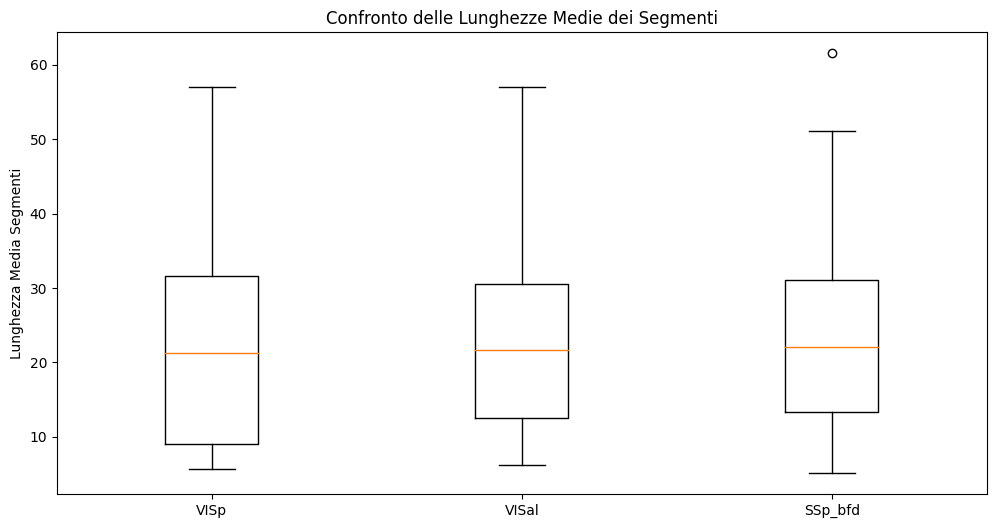

In [7]:
# Analisi statistica
def descriptive_stats(data):
    return {
        'mean': np.mean(data),
        'std': np.std(data),
        'median': np.median(data)
    }

stats_VISp = descriptive_stats(average_segment_length_VISp)
stats_VISal = descriptive_stats(average_segment_length_VISal)
stats_SSp_bfd = descriptive_stats(average_segment_length_SSp_bfd)

print("Statistiche descrittive per VISp:", stats_VISp)
print("Statistiche descrittive per VISal:", stats_VISal)
print("Statistiche descrittive per SSp_bfd:", stats_SSp_bfd)

# Visualizzazione dei risultati
plt.figure(figsize=(12, 6))
plt.boxplot([average_segment_length_VISp, average_segment_length_VISal, average_segment_length_SSp_bfd], labels=['VISp', 'VISal', 'SSp_bfd'])
plt.ylabel('Lunghezza Media Segmenti')
plt.title('Confronto delle Lunghezze Medie dei Segmenti')
plt.show()

In [8]:
# Eseguire il t-test tra VISp e VISal
t_statistic_VISp_VISal, p_value_VISp_VISal = ttest_ind(average_segment_length_VISp, average_segment_length_VISal)
print(f"T-test VISp vs VISal: t-statistic = {t_statistic_VISp_VISal} , p-value = {p_value_VISp_VISal}")

# Eseguire il t-test tra VISp e SSp_bfd
t_statistic_VISp_SSp_bfd, p_value_VISp_SSp_bfd = ttest_ind(average_segment_length_VISp, average_segment_length_SSp_bfd)
print(f"T-test VISp vs SSp_bfd: t-statistic = {t_statistic_VISp_SSp_bfd} , p-value = {p_value_VISp_SSp_bfd}")

# Eseguire il t-test tra VISal e SSp_bfd
t_statistic_VISal_SSp_bfd, p_value_VISal_SSp_bfd = ttest_ind(average_segment_length_VISal, average_segment_length_SSp_bfd)
print(f"T-test VISal vs SSp_bfd: t-statistic = {t_statistic_VISal_SSp_bfd} , p-value = {p_value_VISal_SSp_bfd}")

# Eseguire il KS-test tra VISp e VISal
ks_statistic_VISp_VISal, ks_p_value_VISp_VISal = ks_2samp(average_segment_length_VISp, average_segment_length_VISal)
print(f"KS-test VISp vs VISal: ks-statistic = {ks_statistic_VISp_VISal} , p-value = {ks_p_value_VISp_VISal}")

# Eseguire il KS-test tra VISp e SSp_bfd
ks_statistic_VISp_SSp_bfd, ks_p_value_VISp_SSp_bfd = ks_2samp(average_segment_length_VISp, average_segment_length_SSp_bfd)
print(f"KS-test VISp vs SSp_bfd: ks-statistic = {ks_statistic_VISp_SSp_bfd} , p-value = {ks_p_value_VISp_SSp_bfd}")

# Eseguire il KS-test tra VISal e SSp_bfd
ks_statistic_VISal_SSp_bfd, ks_p_value_VISal_SSp_bfd = ks_2samp(average_segment_length_VISal, average_segment_length_SSp_bfd)
print(f"KS-test VISal vs SSp_bfd: ks-statistic = {ks_statistic_VISal_SSp_bfd} , p-value = {ks_p_value_VISal_SSp_bfd}")

T-test VISp vs VISal: t-statistic = -0.16867822908465255 , p-value = 0.8663385382997761
T-test VISp vs SSp_bfd: t-statistic = -0.5570440622150645 , p-value = 0.5781328603277311
T-test VISal vs SSp_bfd: t-statistic = -0.22767969761428583 , p-value = 0.8202274284648663
KS-test VISp vs VISal: ks-statistic = 0.12215909090909091 , p-value = 0.8321408590827725
KS-test VISp vs SSp_bfd: ks-statistic = 0.15227272727272728 , p-value = 0.18778040893321057
KS-test VISal vs SSp_bfd: ks-statistic = 0.10170454545454545 , p-value = 0.9314253922100302


L'interpretazione dei risultati dei test T e KS test si basa sui valori delle statistiche dei test e dei p-value. Vediamo cosa indicano questi risultati:

### T-test

Il T-test verifica se ci sono differenze significative tra le medie di due gruppi.

#### VISp vs VISal
- **t-statistic = -0.16867822908465255**
- **p-value = 0.8663385382997761**

Un p-value di 0.866 indica che non c'è una differenza significativa tra le medie delle lunghezze dei segmenti dei neuroni delle aree VISp e VISal. Questo suggerisce che è molto probabile che le medie delle lunghezze dei segmenti nei neuroni VISp e VISal siano uguali.

#### VISp vs SSp_bfd
- **t-statistic = -0.5570440622150645**
- **p-value = 0.5781328603277311**

Un p-value di 0.578 indica che non c'è una differenza significativa tra le medie delle lunghezze dei segmenti dei neuroni delle aree VISp e SSp_bfd. Questo suggerisce che è molto probabile che le medie delle lunghezze dei segmenti nei neuroni VISp e SSp_bfd siano uguali.

#### VISal vs SSp_bfd
- **t-statistic = -0.22767969761428583**
- **p-value = 0.8202274284648663**

Un p-value di 0.820 indica che non c'è una differenza significativa tra le medie delle lunghezze dei segmenti dei neuroni delle aree VISal e SSp_bfd. Questo suggerisce che è molto probabile che le medie delle lunghezze dei segmenti nei neuroni VISal e SSp_bfd siano uguali.

### KS-test

Il KS-test verifica se due distribuzioni sono diverse.

#### VISp vs VISal
- **ks-statistic = 0.12215909090909091**
- **p-value = 0.8321408590827725**

Un p-value di 0.832 suggerisce che non c'è una differenza significativa tra le distribuzioni delle lunghezze dei segmenti dei neuroni delle aree VISp e VISal. Questo indica che le distribuzioni delle lunghezze dei segmenti nei neuroni VISp e VISal sono molto probabilmente uguali.

#### VISp vs SSp_bfd
- **ks-statistic = 0.15227272727272728**
- **p-value = 0.18778040893321057**

Un p-value di 0.188 suggerisce che non c'è una differenza significativa tra le distribuzioni delle lunghezze dei segmenti dei neuroni delle aree VISp e SSp_bfd. Questo indica che le distribuzioni delle lunghezze dei segmenti nei neuroni VISp e SSp_bfd sono molto probabilmente uguali.

#### VISal vs SSp_bfd
- **ks-statistic = 0.10170454545454545**
- **p-value = 0.9314253922100302**

Un p-value di 0.931 suggerisce che non c'è una differenza significativa tra le distribuzioni delle lunghezze dei segmenti dei neuroni delle aree VISal e SSp_bfd. Questo indica che le distribuzioni delle lunghezze dei segmenti nei neuroni VISal e SSp_bfd sono molto probabilmente uguali.

### Conclusioni

1. **VISp vs VISal**: Non ci sono differenze significative né nelle medie né nelle distribuzioni delle lunghezze dei segmenti dei neuroni.
2. **VISp vs SSp_bfd**: Non ci sono differenze significative né nelle medie né nelle distribuzioni delle lunghezze dei segmenti dei neuroni.
3. **VISal vs SSp_bfd**: Non ci sono differenze significative né nelle medie né nelle distribuzioni delle lunghezze dei segmenti dei neuroni.

Questi risultati indicano che le lunghezze dei segmenti dei neuroni nelle tre aree considerate (VISp, VISal e SSp_bfd) sono simili sia in termini di medie che di distribuzioni. Non ci sono prove statistiche sufficienti per concludere che ci siano differenze tra queste aree in termini di lunghezze dei segmenti dei neuroni.